## **Factor Analysis on the S&P Dow Jones Indices with XGBoost**

According to the [S&P Dow Jones Indices](https://www.spglobal.com/spdji/en/landing/investment-themes/factors/) website, "Factors such as size, value, and growth have played a part in asset allocation decisions for decades. With the advent of factor indexing, passive investors gained access to a broader range of exposures. Today, investors can access factors both individually and in combination through a range of ETFs, tapping into a world of sophisticated strategies that were once available only via active management."

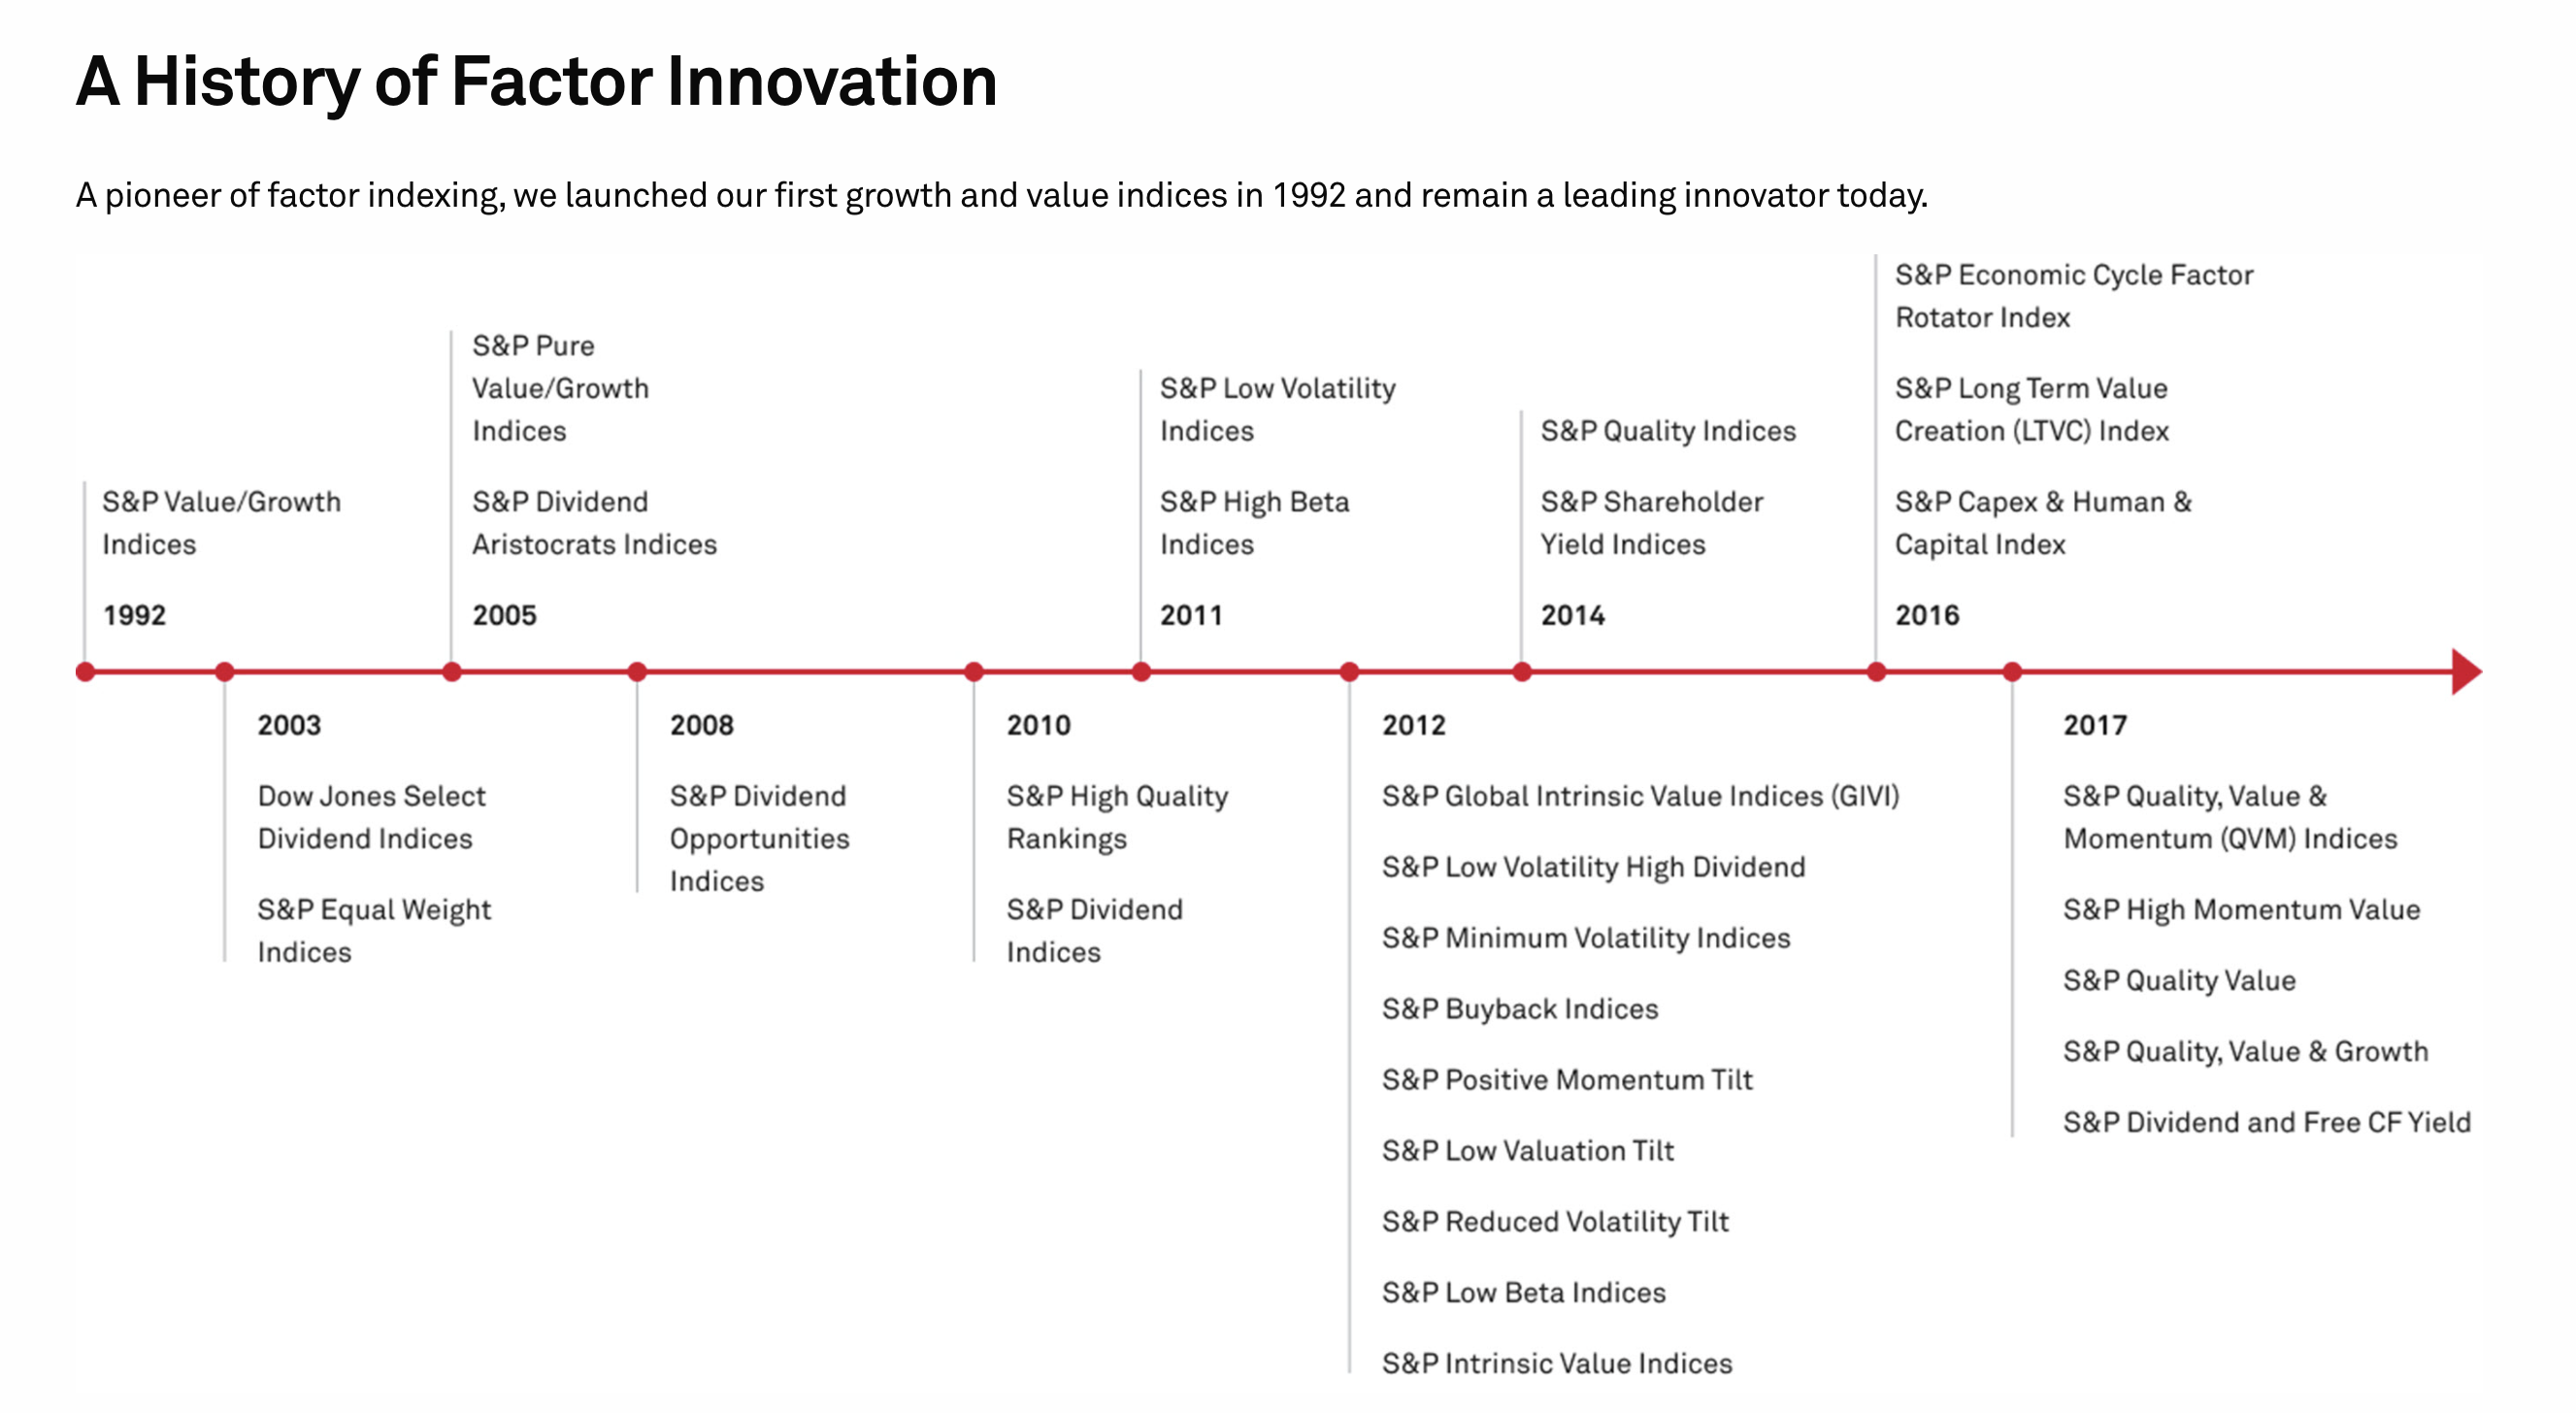

These indices are divided into 6 categories: Dividend Yield, Enhanced Value, Low Volatility, Momentum, Quality, and Size. Currently, there are 22 S&P Indices, and this project focuses on finding the most important indices to contribute to a portfolio. I then used the 10-year data to check the portfolio performance, and used S&P 500 Index as benchmark.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
indices = pd.read_csv("p.csv")
indices = indices.iloc[:,1:]
indices.head()

,Effective date,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P 500 High Dividend Index,S&P 500 Enhanced Value Index,S&P MidCap 400 Enhanced Value Index (USD),S&P SmallCap 600 Enhanced Value Index (USD),S&P 500 EQUAL WEIGHTED,S&P MidCap 400 Equal Weighted Index,S&P SmallCap 600 Equal Weighted Index,...,S&P 500 Low Volatility Index,S&P 500 Quality (US Dollar),S&P SmallCap 600 Quality,S&P MidCap 400 Quality Index (USD),S&P 500 Momentum Index (US Dollar),S&P MidCap 400 Momentum Index (USD),S&P SmallCap 600 Momentum Index (USD),S&P 500,S&P 400,S&P 600
0,2012-03-01,0.005721,0.001979,0.001648,0.012205,0.008087,0.003123,0.006259,0.006963,0.004704,...,0.002526,0.005395,0.009390,0.011288,0.006454,0.012805,0.011300,0.006158,0.008063,0.005876
1,2012-03-02,-0.008347,-0.003237,-0.001812,-0.004292,-0.010330,-0.018876,-0.005130,-0.009972,-0.018892,...,-0.000313,-0.002820,-0.017186,-0.009794,-0.002809,-0.007118,-0.014608,-0.003246,-0.008313,-0.016400
2,2012-03-05,0.001505,0.002125,0.000037,-0.006825,-0.003498,-0.003479,-0.005952,-0.003656,0.001430,...,0.002630,-0.003226,0.000807,-0.003234,-0.002840,-0.006712,-0.000845,-0.003870,-0.003695,0.002196
3,2012-03-06,-0.015447,-0.013843,-0.011293,-0.024024,-0.026365,-0.022371,-0.018128,-0.019498,-0.019877,...,-0.007708,-0.012960,-0.019128,-0.018203,-0.013887,-0.019361,-0.020800,-0.015370,-0.019087,-0.019476
4,2012-03-07,0.007487,0.003944,0.001941,0.011434,0.012396,0.010426,0.008193,0.009756,0.011389,...,0.002648,0.006822,0.008484,0.009844,0.006540,0.008709,0.009483,0.006901,0.009593,0.009806


After loading the data, I selected 3 indices from each category into my portfolio, and gave them equal weights. After that, I calculated the portfolio daily return and compared it with the S&P 500 Index return. I set a variable "better" for the result. If the portfolio is better, better = 1; if not, better = 0. I then calculate the difference between the returns of each indice and S&P 500. The new table includes the margin of each indice and the daily performance of the portfolio.

In [ ]:
columns = ['Effective date', 'S&P 600', 'S&P 400','S&P 500']
sp500 = indices[["S&P 500"]]
table = indices.drop(columns = columns)

table['mean'] = table.mean(axis=1)
table["sp500"] = sp500
table['better'] = np.where(table['sp500']< table['mean'],0,1)
cols = table.columns.tolist()
for i in cols:
  if i not in ['mean','sp500','better']:
    table[i] = table[i] - table['sp500']
table = table.drop(columns = ['mean','sp500'])
table.head()

,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P 500 High Dividend Index,S&P 500 Enhanced Value Index,S&P MidCap 400 Enhanced Value Index (USD),S&P SmallCap 600 Enhanced Value Index (USD),S&P 500 EQUAL WEIGHTED,S&P MidCap 400 Equal Weighted Index,S&P SmallCap 600 Equal Weighted Index,S&P MidCap 400 Low Volatility Index,S&P SmallCap 600 Low Volatility Index,S&P 500 Low Volatility Index,S&P 500 Quality (US Dollar),S&P SmallCap 600 Quality,S&P MidCap 400 Quality Index (USD),S&P 500 Momentum Index (US Dollar),S&P MidCap 400 Momentum Index (USD),S&P SmallCap 600 Momentum Index (USD),better
0,-0.000437,-0.004179,-0.004510,0.006047,0.001929,-0.003035,0.000101,0.000804,-0.001454,-0.003040,-0.005216,-0.003632,-0.000763,0.003232,0.005130,0.000296,0.006647,0.005142,0
1,-0.005101,0.000009,0.001434,-0.001046,-0.007084,-0.015630,-0.001885,-0.006727,-0.015646,-0.002995,-0.009544,0.002933,0.000425,-0.013940,-0.006548,0.000437,-0.003872,-0.011362,1
2,0.005374,0.005995,0.003907,-0.002955,0.000372,0.000391,-0.002082,0.000214,0.005299,0.009037,0.011414,0.006500,0.000644,0.004677,0.000636,0.001030,-0.002842,0.003024,0
3,-0.000077,0.001527,0.004077,-0.008654,-0.010995,-0.007001,-0.002758,-0.004128,-0.004507,0.004420,0.002598,0.007662,0.002410,-0.003758,-0.002832,0.001483,-0.003991,-0.005430,1
4,0.000586,-0.002956,-0.004959,0.004534,0.005495,0.003526,0.001293,0.002855,0.004488,-0.001680,0.000091,-0.004252,-0.000079,0.001584,0.002944,-0.000360,0.001808,0.002582,0


After cleaning and manipulating the data, I used XGBoost model to train the data. Before the process, I assigned the data into training and testing groups, and standardized the margin.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import roc_curve, auc,mean_squared_error,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [ ]:
X,y = table.iloc[:,:-1], table['better']
feature_names = X.columns.tolist()
X = StandardScaler().fit_transform(X)
data_dmatrix = xgb.DMatrix(data=X,label=y,feature_names=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Mean cross-validation score: 0.94
K-fold CV average score: 0.95
[[248   6]
 [ 16 236]]


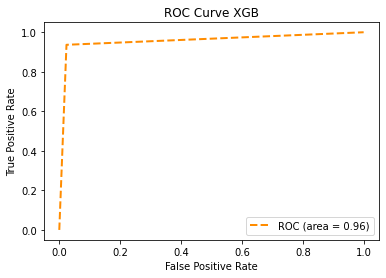

In [ ]:
### Calculate and plot AUC
fpr, tpr, thersholds = roc_curve(y_test, y_pred)
 
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', color='darkorange',label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve XGB')
plt.legend(loc="lower right")
plt.show()


The model has a 95% accuracy and 0.96 AUC. Now it is time to look at the importances of different indices.

In [ ]:
xgbc.feature_importances_

array([0.07199597, 0.0240685 , 0.02154657, 0.01037612, 0.0133891 ,
       0.02955245, 0.04824366, 0.41661808, 0.05567685, 0.03087954,
       0.11629162, 0.00697378, 0.00662695, 0.07253625, 0.01496696,
       0.01422675, 0.01902265, 0.02700826], dtype=float32)

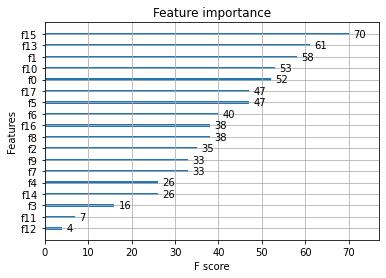

In [ ]:
plot_importance(xgbc)

Based on the visualization, the top 7 indices are more important in determining the performance of the portfolio. Therefore, I decided to take them out as a new portfolio and repeat the process to test the result.

In [ ]:
importantIndices = table.iloc[:,[0,1,5,10,13,15,17]].columns.tolist()
importantIndices

['S&P MidCap 400 Dividend Aristocrats',
 'S&P High Yield Dividend Aristocrats Index',
 'S&P SmallCap 600 Enhanced Value Index (USD)',
 'S&P SmallCap 600 Low Volatility Index',
 'S&P SmallCap 600 Quality',
 'S&P 500 Momentum Index (US Dollar)',
 'S&P SmallCap 600 Momentum Index (USD)']

In [ ]:
newTable = indices.drop(columns = columns)[importantIndices]
newTable['mean'] = newTable.mean(axis=1)
newTable["sp500"] = sp500
newTable['better'] = np.where(newTable['sp500']< newTable['mean'],0,1)
cols = newTable.columns.tolist()
for i in cols:
  if i not in ['mean','sp500','better']:
    newTable[i] = newTable[i] - newTable['sp500']
newTable = newTable.drop(columns = ['mean','sp500'])
newTable.head()

,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P SmallCap 600 Enhanced Value Index (USD),S&P SmallCap 600 Low Volatility Index,S&P SmallCap 600 Quality,S&P 500 Momentum Index (US Dollar),S&P SmallCap 600 Momentum Index (USD),better
0,-0.000437,-0.004179,-0.003035,-0.005216,0.003232,0.000296,0.005142,1
1,-0.005101,0.000009,-0.015630,-0.009544,-0.013940,0.000437,-0.011362,1
2,0.005374,0.005995,0.000391,0.011414,0.004677,0.001030,0.003024,0
3,-0.000077,0.001527,-0.007001,0.002598,-0.003758,0.001483,-0.005430,1
4,0.000586,-0.002956,0.003526,0.000091,0.001584,-0.000360,0.002582,0


In [ ]:
X,y = newTable.iloc[:,:-1], newTable['better']
X = StandardScaler().fit_transform(X)
feature_names = X.columns.tolist()
data_dmatrix = xgb.DMatrix(data=X,label=y,feature_names=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgbc2 = XGBClassifier()
xgbc2.fit(X_train, y_train)
scores = cross_val_score(xgbc2, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc2, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbc2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Mean cross-validation score: 0.96
K-fold CV average score: 0.96
[[239   9]
 [ 15 243]]


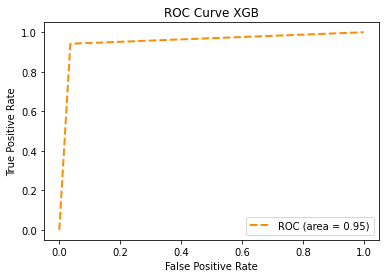

In [ ]:
### Calculate and plot AUC
fpr, tpr, thersholds = roc_curve(y_test, y_pred)
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', color='darkorange',label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve XGB')
plt.legend(loc="lower right")
plt.show()


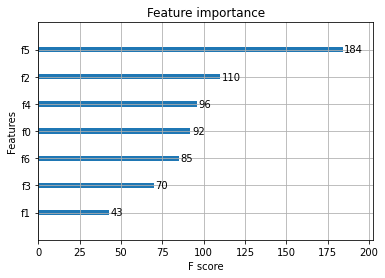

In [ ]:
plot_importance(xgbc2)

I then use Principal Components Analysis to plot the importance of variables.

In [ ]:
newPort = newTable.iloc[:,:-1]

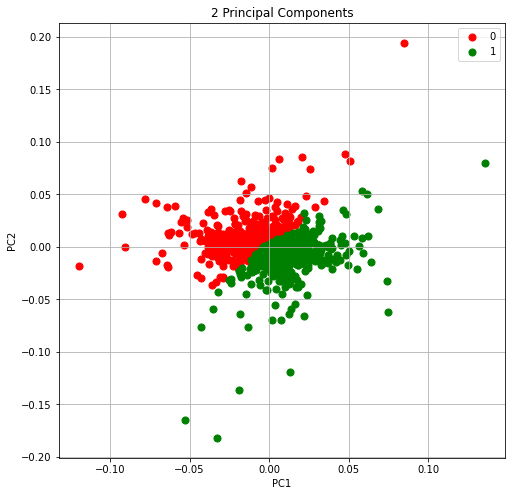

In [ ]:
pca2 = PCA(n_components=7)
newX = pca2.fit_transform(newPort)  ### the new data
invX = pca2.inverse_transform(newPort)

pcaDf = pd.DataFrame(data = newX, columns = list(range(7)))
finalDF = pd.concat([pcaDf, newTable[['better']]],axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1")
ax.set_ylabel('PC2')
ax.set_title('2 Principal Components')

targets = [0,1]
colors = ['r','g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['better'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

The final result shows that when the PC1s are high, the portfolio is outperforming the S&P 500 index, with an accuracy of 96%.


These are the final components of the portfolio: 'S&P MidCap 400 Dividend Aristocrats',
 'S&P High Yield Dividend Aristocrats Index',
 'S&P SmallCap 600 Enhanced Value Index (USD)',
 'S&P SmallCap 600 Low Volatility Index',
 'S&P SmallCap 600 Quality',
 'S&P 500 Momentum Index (US Dollar)',
 'S&P SmallCap 600 Momentum Index (USD)'.
